# Oasis Infobyte : Data Science Internship


# Task 3 : Car Price Pridiction with Machine Learning

# Name of Intern : Nischay Singh

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_splitr̥
%matplotlib inline

In [4]:
data = pd.read_csv('car data.csv')

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.shape

(301, 9)

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
data=data.drop(columns=['Car_Name'])
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
categorical_features=[col for col in data.columns if data[col].dtype=='O']
categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission']

In [12]:
numerical_features=[col for col in data.columns if data[col].dtype!='O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

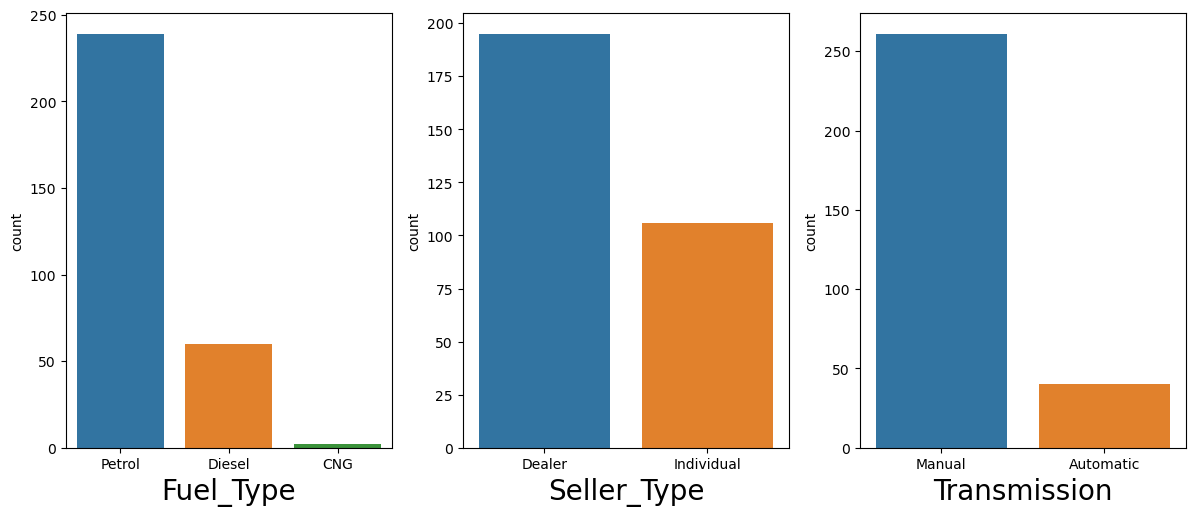

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in categorical_features:
    if plotnumber<=3:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=column,data=data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
        

In [14]:
data=pd.get_dummies(data)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [15]:
feature=["Year","Present_Price","Kms_Driven","Owner","Fuel_Type_CNG","Fuel_Type_Diesel","Seller_Type_Dealer","Transmission_Automatic"]
x=data[feature]
y=data.Selling_Price

In [16]:
x.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic
0,2014,5.59,27000,0,0,0,1,0
1,2013,9.54,43000,0,0,1,1,0
2,2017,9.85,6900,0,0,0,1,0
3,2011,4.15,5200,0,0,0,1,0
4,2014,6.87,42450,0,0,1,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

In [19]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((225, 8), (225,), (76, 8), (76,))

<Figure size 1200x1200 with 0 Axes>

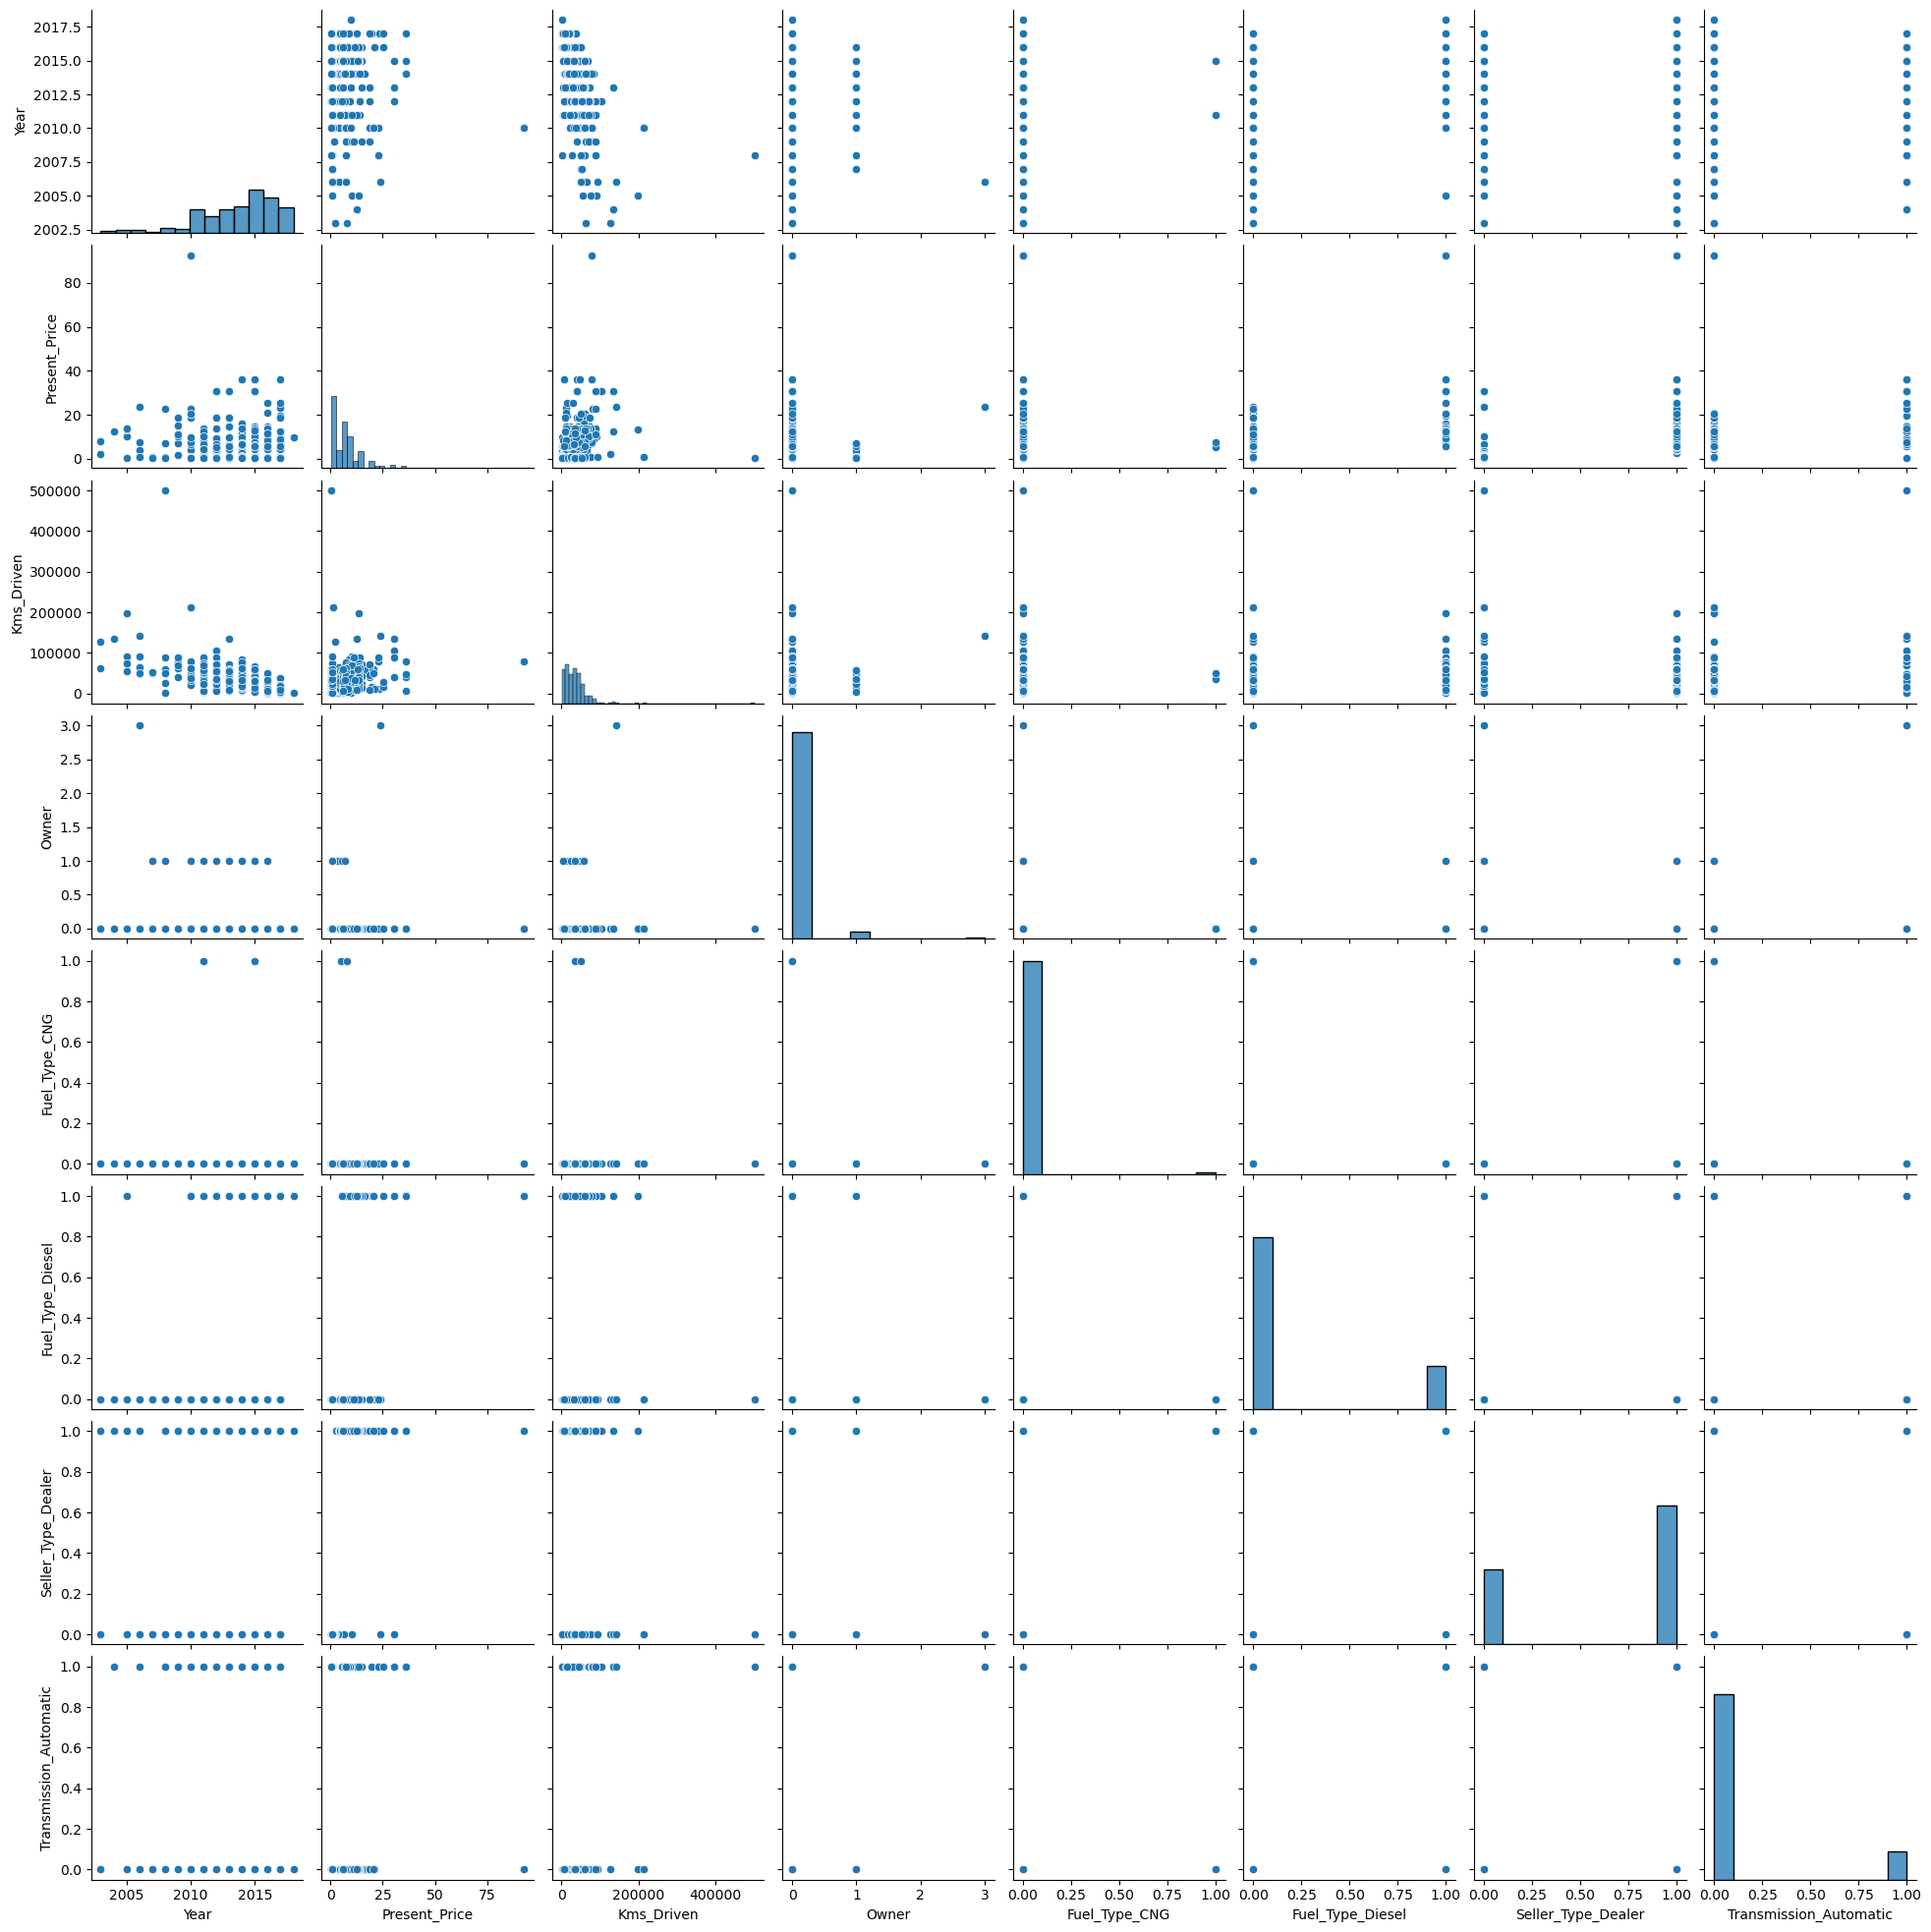

In [20]:
plt.figure(figsize=(12,12))
sns.pairplot(data[feature])
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
prediction=lr.predict(x_test)

In [24]:
lr.score(x_train,y_train)

0.8799908666232621

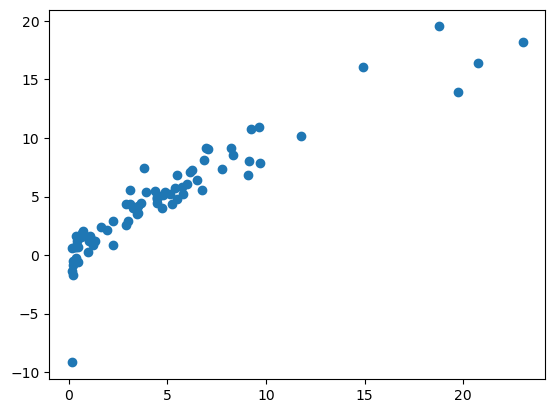

In [25]:
plt.scatter(y_test,prediction)

In [26]:
from sklearn import metrics

In [27]:
print('MAE :',metrics.mean_absolute_error(y_test,prediction))
print('MSE :',metrics.mean_squared_error(y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared :',metrics.r2_score(y_test,prediction))

MAE : 1.1409961087856992
MSE : 3.2815963416670617
RMSE : 1.8115176901336243
R squared : 0.8608525898495389
